### Importing Libraries

In [3]:
import pandas as pd
import numpy as np

### Import data

In [6]:
data = pd.read_csv('customer Dataset.csv')

In [8]:
len(data)

1000

#### Head of First Few Entries 

In [11]:
data.head(4)

,Customer_ID,Age,Number_of_Previous_Jobs,Income_Level,Subscription_Years,Has_Mobile_App,Purchase_Count,Review_Rating,Annual_Spend,Education_Years
0,1,86.674826,15.000000,High,0.84,0,8.176449,5,44208.19,14.0
1,2,86.045678,15.000000,Low,2.90,0,3.168492,3,14373.85,NaN
2,3,91.364302,14.272860,Medium,3.57,1,6.304580,4,31689.01,20.0
3,4,92.064757,12.412951,Low,1.50,1,2.328660,5,26693.14,NaN


In [13]:
data['Education_Years'].unique()

array([14., nan, 20., 12., 11.,  9., 13., 15.,  7.,  6., 17.,  8., 10.,
       16., 18., 19.])

In [15]:
data['Income_Level']

0        High
1         Low
2      Medium
3         Low
4         Low
        ...  
995       Low
996      High
997       Low
998       Low
999       Low
Name: Income_Level, Length: 1000, dtype: object

In [17]:
data.dtypes

Customer_ID                  int64
Age                        float64
Number_of_Previous_Jobs    float64
Income_Level                object
Subscription_Years         float64
Has_Mobile_App               int64
Purchase_Count             float64
Review_Rating                int64
Annual_Spend               float64
Education_Years            float64
dtype: object

Age - Continuous (keep as it is)
Number of Previous Jobs - make it Discrete (Given - Continuous)
Income Level - Ordinal (is in words - high, low, medium)
Subscription Years - Given Continiuous (keep as it is)
Has mobile app - Categorical / Nominal (0 and 1)
Purchase Count - Is Continuous - Has to be Discrete
Annual Spend - Continuous (Good)
Education Years = Discrete (Good)

### Missing Data Handling

In [21]:
data.isna().sum()

Customer_ID                  0
Age                         60
Number_of_Previous_Jobs      0
Income_Level                 0
Subscription_Years           0
Has_Mobile_App               0
Purchase_Count               0
Review_Rating                0
Annual_Spend                40
Education_Years            558
dtype: int64

In [23]:
data.describe()

,Customer_ID,Age,Number_of_Previous_Jobs,Subscription_Years,Has_Mobile_App,Purchase_Count,Review_Rating,Annual_Spend,Education_Years
count,1000.000000,940.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,960.000000,442.00000
mean,500.500000,35.652780,3.151356,4.992300,0.502000,3.942137,3.361000,11515.181396,13.09276
std,288.819436,7.446302,2.013504,5.073993,0.500246,2.048594,1.321524,8708.829479,4.34436
min,1.000000,18.793663,0.000000,0.020000,0.000000,0.000000,1.000000,-4798.320000,6.00000
25%,250.750000,31.760851,1.816560,1.400000,0.000000,2.505589,2.000000,5394.465000,9.00000
50%,500.500000,35.132442,2.907410,3.405000,1.000000,3.779934,3.000000,9464.785000,13.00000
75%,750.250000,38.380070,4.237716,6.777500,1.000000,5.255708,5.000000,16004.910000,17.00000
max,1000.000000,94.362122,15.000000,37.630000,1.000000,12.161729,5.000000,44208.190000,20.00000


In [25]:
data['Income_Level'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

#### Missing Value Data Patter Analysis

In [28]:
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency

In [30]:
# msno.matrix(data)
# sns.heatmap(data.isnull(), cbar=False, cmap='viridis')


# df_missing_corr = data.isnull().corr()
# df_missing_corr

# missing_cols = ['Age', 'Annual_Spend', 'Education_Years', 'Income_Level']
# for col in missing_cols:
#     if data[col].isnull().sum() > 0:
#         observed = pd.crosstab(data[col].isnull(), data['Income_Level'], margins=False)
#         if not observed.empty:
#             chi2, p, _, _ = chi2_contingency(observed)
#             print(f"Missingness in {col}: p-value = {p}")

# # Handling missing values based on MCAR/MAR analysis
# imputer = KNNImputer(n_neighbors=3)  # Using KNN for better imputation if MAR detected
# data[['Age', 'Annual_Spend', 'Education_Years']] = imputer.fit_transform(data[['Age', 'Annual_Spend', 'Education_Years']])
# data['Income_Level'].fillna(data['Income_Level'].mode()[0], inplace=True)

# # Convert variables according to classifications
# data['Number_of_Previous_Jobs'] = data['Number_of_Previous_Jobs'].astype('int64')  # Discrete
# data['Income_Level'] = pd.Categorical(data['Income_Level'], categories=['low', 'medium', 'high'], ordered=True)  # Ordinal
# data['Has_Mobile_App'] = data['Has_Mobile_App'].astype('category')  # Categorical/Nominal
# data['Purchase_Count'] = data['Purchase_Count'].astype('int64')  # Discrete
# data['Education_Years'] = data['Education_Years'].astype('int64')  # Discrete

# # Display resulting data types
# print(df.dtypes)


In [32]:
# Verify with other columns to see if these are true!
### Age - MAR
### Income - MNAR
### Annual Spend - MNAR
### Education Years - 

In [34]:
data['Income_Level']

0        High
1         Low
2      Medium
3         Low
4         Low
        ...  
995       Low
996      High
997       Low
998       Low
999       Low
Name: Income_Level, Length: 1000, dtype: object

#### Dataset Features Conversion

In [37]:
## Imputing the Null Entries
df=data 
df['Age'].fillna(df['Age'].mean(), inplace=True) # type : ignore
df['Annual_Spend'].fillna(df['Annual_Spend'].median(), inplace=True) # type : ignore
df['Education_Years'].fillna(df['Education_Years'].median(), inplace=True) # type : ignore


## Converting the Data Types
df['Number_of_Previous_Jobs'] = df['Number_of_Previous_Jobs'].astype('int64')  # Discrete # type : ignore
df['Has_Mobile_App'] = df['Has_Mobile_App'].astype('category')  # Categorical/Nominal
df['Purchase_Count'] = df['Purchase_Count'].astype('int64')  # Discrete
df['Education_Years'] = df['Education_Years'].astype('int64')  # Discrete
data['Income_Level'] = data['Income_Level'].astype('category').cat.codes



## Converting Age and Subscription years

df['Age'] = df['Age'].round().astype(int)
df['Subscription_Months'] = (df['Subscription_Years'] * 12).round().astype(int)
df = df.drop(['Subscription_Years'], axis=1)

df['Income_Level'] = df['Income_Level'].astype('category')
df['Review_Rating'] = df['Review_Rating'].astype('category')

/var/folders/fm/0vd3xnfx4sb4qv25lnyjcqf00000gn/T/ipykernel_66434/1906473077.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True) # type : ignore
/var/folders/fm/0vd3xnfx4sb4qv25lnyjcqf00000gn/T/ipykernel_66434/1906473077.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [39]:
df

,Customer_ID,Age,Number_of_Previous_Jobs,Income_Level,Has_Mobile_App,Purchase_Count,Review_Rating,Annual_Spend,Education_Years,Subscription_Months
0,1,87,15,0,0,8,5,44208.19,14,10
1,2,86,15,1,0,3,3,14373.85,13,35
2,3,91,14,2,1,6,4,31689.01,20,43
3,4,92,12,1,1,2,5,26693.14,13,18
4,5,85,12,1,0,4,3,12150.15,13,23
...,...,...,...,...,...,...,...,...,...,...
995,996,34,1,1,1,2,3,3654.56,13,47
996,997,44,5,0,1,5,2,30163.81,9,27
997,998,38,1,1,1,2,2,2175.08,13,5
998,999,32,2,1,1,2,2,1933.03,13,13


In [41]:
data=df
data.head(7)

,Customer_ID,Age,Number_of_Previous_Jobs,Income_Level,Has_Mobile_App,Purchase_Count,Review_Rating,Annual_Spend,Education_Years,Subscription_Months
0,1,87,15,0,0,8,5,44208.19,14,10
1,2,86,15,1,0,3,3,14373.85,13,35
2,3,91,14,2,1,6,4,31689.01,20,43
3,4,92,12,1,1,2,5,26693.14,13,18
4,5,85,12,1,0,4,3,12150.15,13,23
5,6,94,15,1,0,1,3,18146.82,13,5
6,7,86,13,2,0,4,3,21844.77,12,22


In [43]:
data.dtypes

Customer_ID                   int64
Age                           int64
Number_of_Previous_Jobs       int64
Income_Level               category
Has_Mobile_App             category
Purchase_Count                int64
Review_Rating              category
Annual_Spend                float64
Education_Years               int64
Subscription_Months           int64
dtype: object

In [45]:
data = data.drop(['Customer_ID'], axis=1)

In [47]:
data.dtypes

Age                           int64
Number_of_Previous_Jobs       int64
Income_Level               category
Has_Mobile_App             category
Purchase_Count                int64
Review_Rating              category
Annual_Spend                float64
Education_Years               int64
Subscription_Months           int64
dtype: object

In [49]:
data.head(6)

,Age,Number_of_Previous_Jobs,Income_Level,Has_Mobile_App,Purchase_Count,Review_Rating,Annual_Spend,Education_Years,Subscription_Months
0,87,15,0,0,8,5,44208.19,14,10
1,86,15,1,0,3,3,14373.85,13,35
2,91,14,2,1,6,4,31689.01,20,43
3,92,12,1,1,2,5,26693.14,13,18
4,85,12,1,0,4,3,12150.15,13,23
5,94,15,1,0,1,3,18146.82,13,5


### Skewness and Kurtosis Description 

In [52]:
import pandas as pd
import scipy.stats as stats


numeric_columns = data.select_dtypes(include=['number']).columns  
desc_stats = data[numeric_columns].describe().T

# Calculate skewness and kurtosis for numeric columns
desc_stats['skew'] = data[numeric_columns].skew()
desc_stats['kurtosis'] = data[numeric_columns].kurtosis()

# For categorical columns, unique values and mode
for col in data.select_dtypes(include=['category']).columns:
    desc_stats.loc[col, 'unique'] = data[col].nunique()
    desc_stats.loc[col, 'mode'] = data[col].mode()[0]


desc_stats


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,unique,mode
Age,1000.0,35.66500,7.214348,19.00,32.0000,35.000,38.000,94.00,4.187335,29.986393,NaN,NaN
Number_of_Previous_Jobs,1000.0,2.68400,2.020452,0.00,1.0000,2.000,4.000,15.00,1.931317,8.550344,NaN,NaN
Purchase_Count,1000.0,3.45000,2.033134,0.00,2.0000,3.000,5.000,12.00,0.499586,0.298372,NaN,NaN
Annual_Spend,1000.0,11433.16554,8542.161652,-4798.32,5506.7375,9464.785,15562.355,44208.19,1.073247,0.786004,NaN,NaN
Education_Years,1000.0,13.04100,2.886807,6.00,13.0000,13.000,13.000,20.00,0.037561,1.043922,NaN,NaN
Subscription_Months,1000.0,59.91000,60.908339,0.00,17.0000,41.000,81.250,452.00,1.991001,5.528214,NaN,NaN
Income_Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0
Has_Mobile_App,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
Review_Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0


### Univariate measure Visualizations

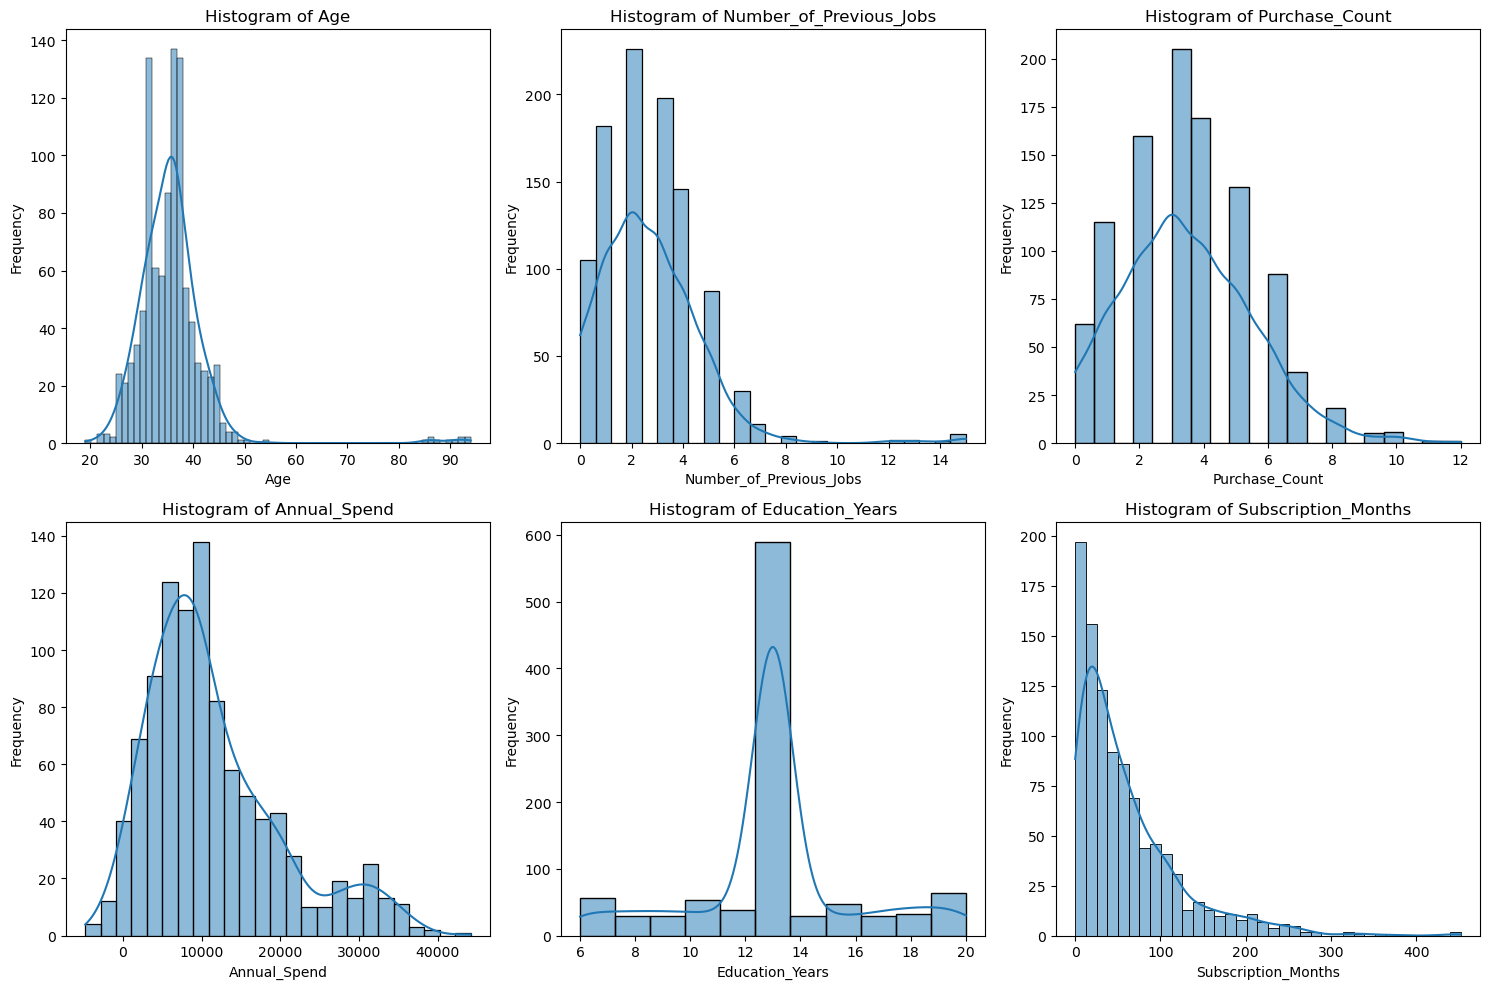

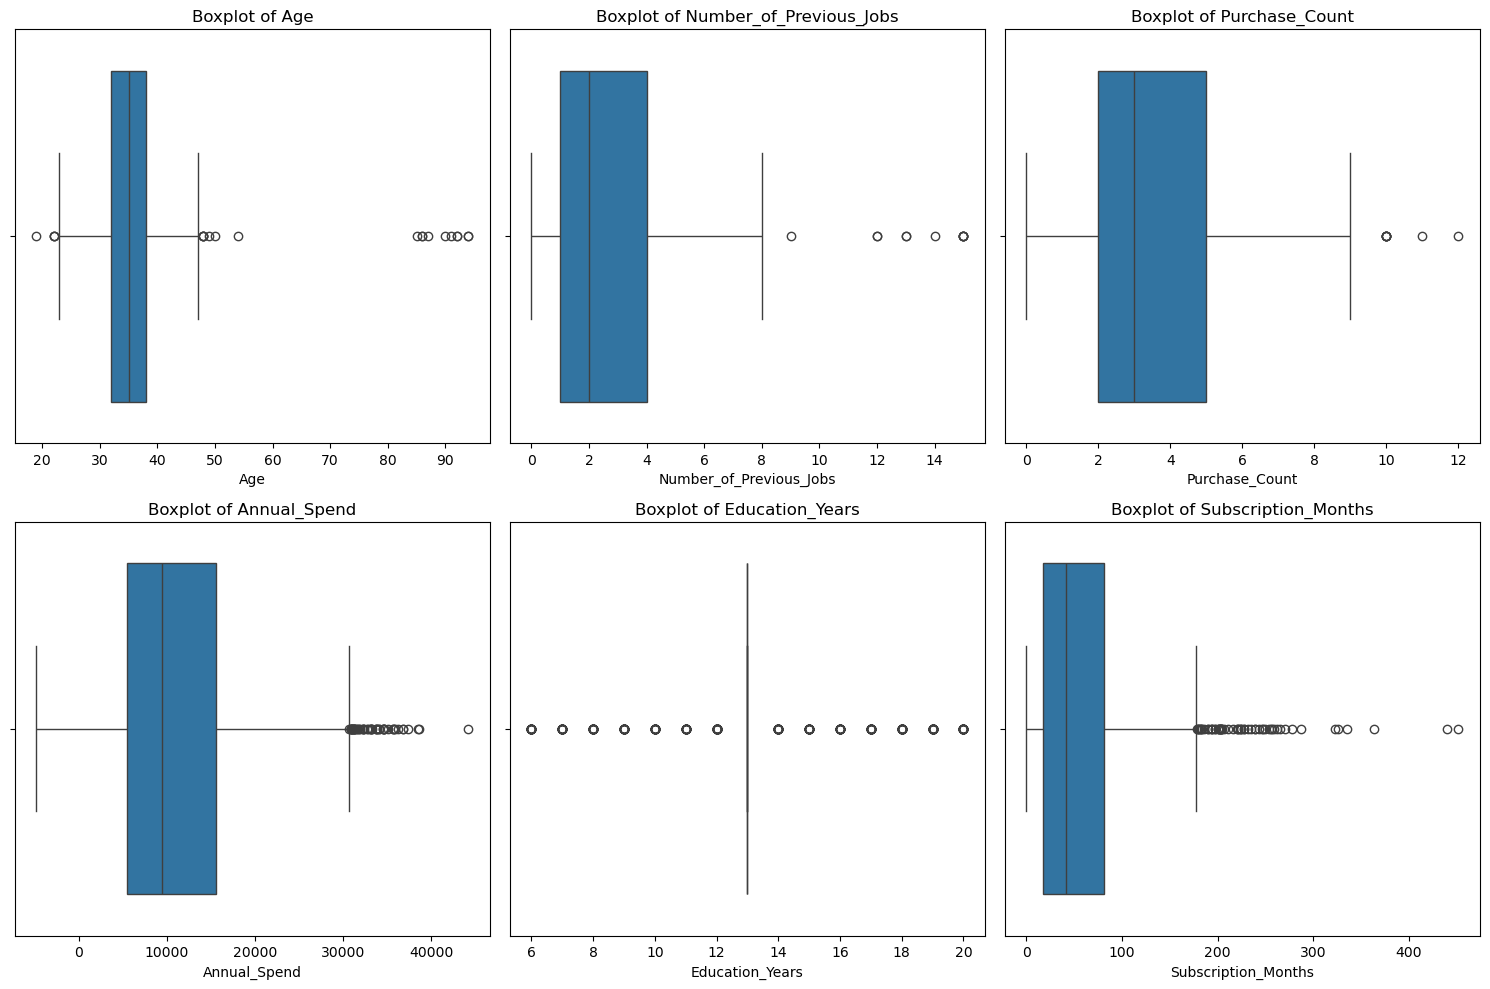

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

# List of numeric columns for visualization
numeric_columns = data.select_dtypes(include=['number']).columns

# Generate histograms
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, len(numeric_columns)//2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Generate boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, len(numeric_columns)//2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


#### Bar Charts for the Categories

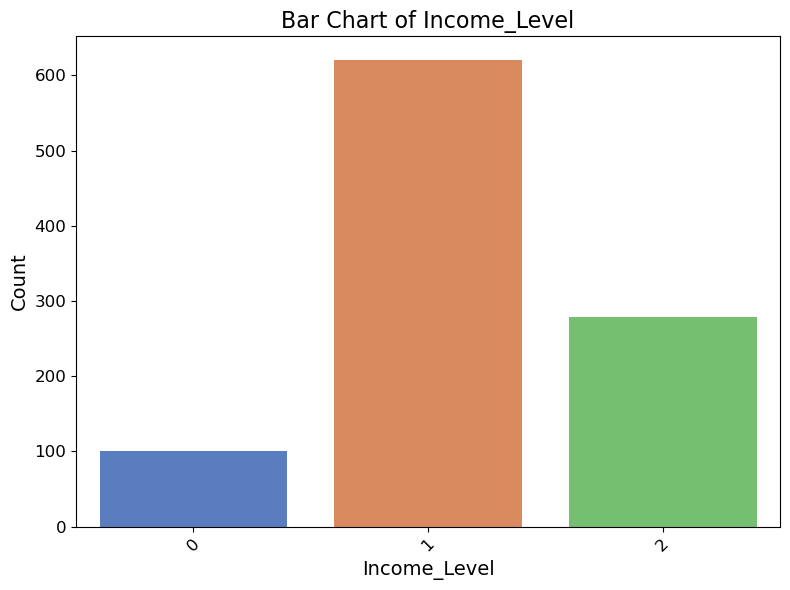

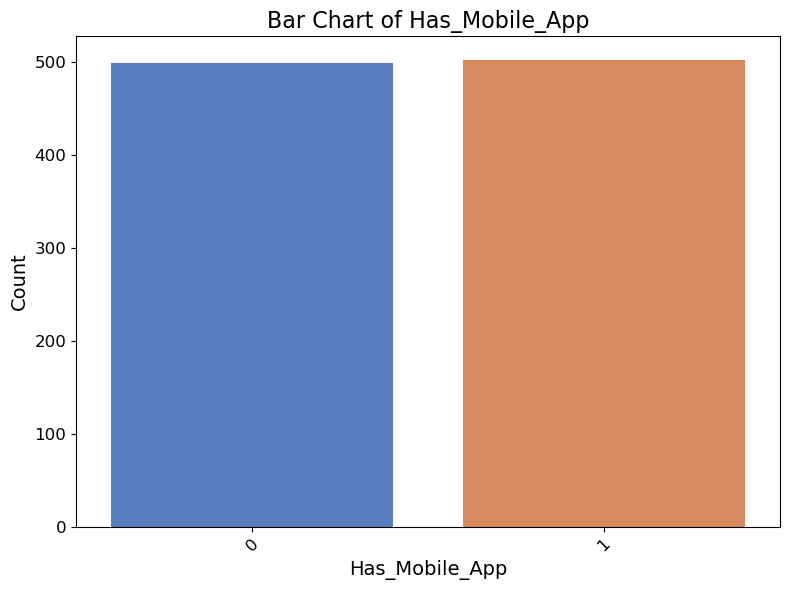

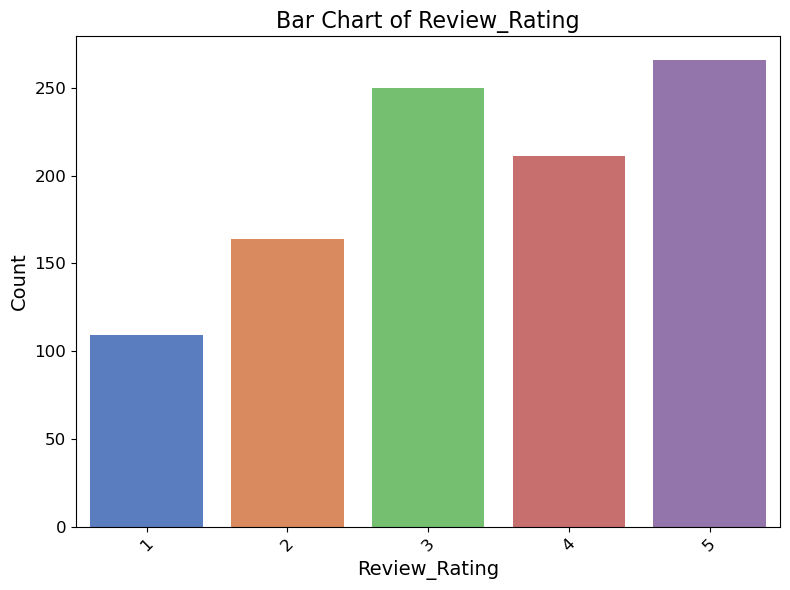

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# List of categorical columns to plot
categorical_columns = ['Income_Level', 'Has_Mobile_App', 'Review_Rating']

# Create a bar plot for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.countplot(data=data, x=col, palette='muted') 
    plt.title(f'Bar Chart of {col}', fontsize=16)  
    plt.xlabel(col, fontsize=14)  # X-axis label
    plt.ylabel('Count', fontsize=14)  # Y-axis label
    plt.xticks(rotation=45, fontsize=12) 
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()  # Show plot


#### Missing Value Analysis 

In [60]:

data_m = pd.read_csv('customer Dataset.csv')

# Creating binary columns indicating whether each variable is missing
for col in ['Age', 'Annual_Spend', 'Education_Years']:
    data_m[f'{col}_missing'] = data_m[col].isna().astype(int)


categorical_columns = ['Income_Level', 'Has_Mobile_App', 'Review_Rating']

# For each variable with missing data, calculate frequency counts by 'missing' status
for col in ['Age', 'Annual_Spend', 'Education_Years']:
    print(f"\nFrequency counts for missing vs non-missing {col} values:\n")
    for cat_col in categorical_columns:
        print(f"\n--- {cat_col} ---")
        print("Missing:")
        print(data_m[data_m[f'{col}_missing'] == 1][cat_col].value_counts())
        print("Not Missing:")
        print(data_m[data_m[f'{col}_missing'] == 0][cat_col].value_counts())
        print("\n")



Frequency counts for missing vs non-missing Age values:


--- Income_Level ---
Missing:
Income_Level
Low       43
Medium    11
High       6
Name: count, dtype: int64
Not Missing:
Income_Level
Low       578
Medium    268
High       94
Name: count, dtype: int64



--- Has_Mobile_App ---
Missing:
Has_Mobile_App
1    30
0    30
Name: count, dtype: int64
Not Missing:
Has_Mobile_App
1    472
0    468
Name: count, dtype: int64



--- Review_Rating ---
Missing:
Review_Rating
5    16
4    14
3    12
1    10
2     8
Name: count, dtype: int64
Not Missing:
Review_Rating
5    250
3    238
4    197
2    156
1     99
Name: count, dtype: int64



Frequency counts for missing vs non-missing Annual_Spend values:


--- Income_Level ---
Missing:
Income_Level
Low       24
Medium    13
High       3
Name: count, dtype: int64
Not Missing:
Income_Level
Low       597
Medium    266
High       97
Name: count, dtype: int64



--- Has_Mobile_App ---
Missing:
Has_Mobile_App
0    22
1    18
Name: count, dtype: int64

#### Correlation Matrix

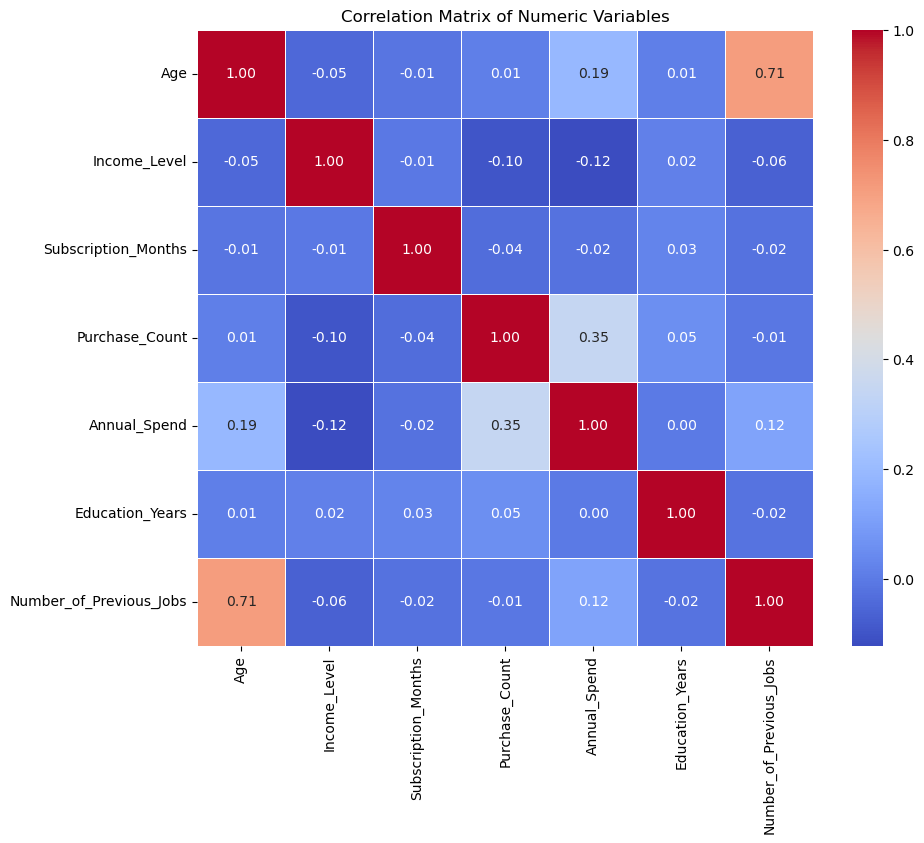

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the dataframe containing your dataset

# Step 1: Select numeric variables (you can adjust this list based on your dataset)
numeric_columns = ['Age', 'Income_Level','Subscription_Months', 'Purchase_Count', 'Annual_Spend', 'Education_Years', 'Number_of_Previous_Jobs']

# Step 2: Calculate the correlation matrix0
correlation_matrix = data[numeric_columns].corr()

# Step 3: Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


### Side by Side bOxplot of each categoyr against annual spend

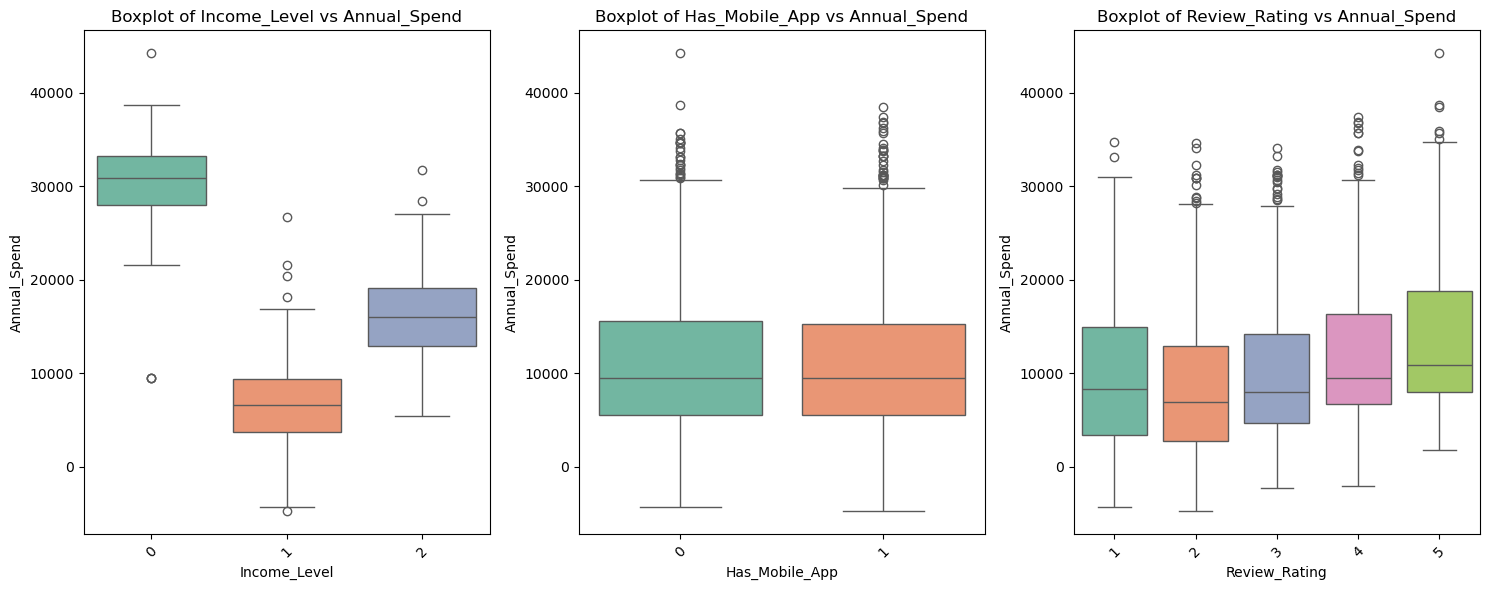

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the dataframe containing your dataset

# Step 1: List of categorical variables (update this based on your dataset)
categorical_vars = ['Income_Level', 'Has_Mobile_App', 'Review_Rating']

# Step 2: Create side-by-side boxplots for each category variable against Annual_Spend
plt.figure(figsize=(15, 6))  # Set the size of the figure

# Create boxplot for each categorical variable
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, len(categorical_vars), i)  # Create a subplot for each variable
    sns.boxplot(x=var, y='Annual_Spend', data=data, palette='Set2')
    plt.title(f'Boxplot of {var} vs Annual_Spend')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plots
plt.tight_layout()
plt.show()

#### Measures Vs Annual Spend

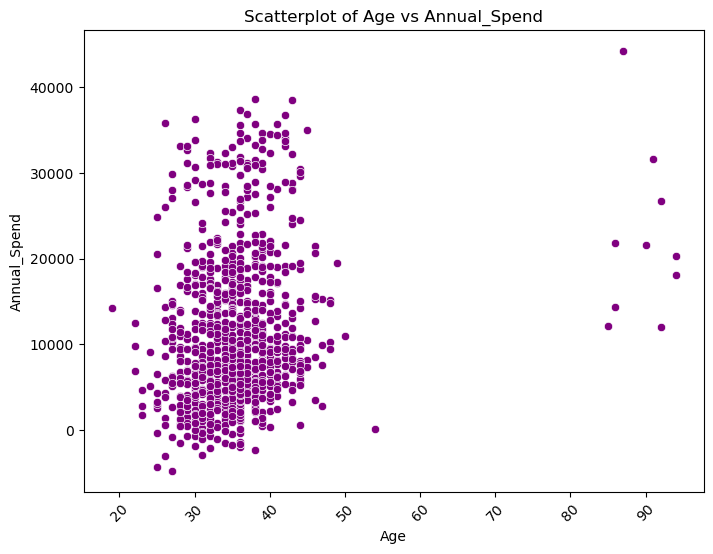

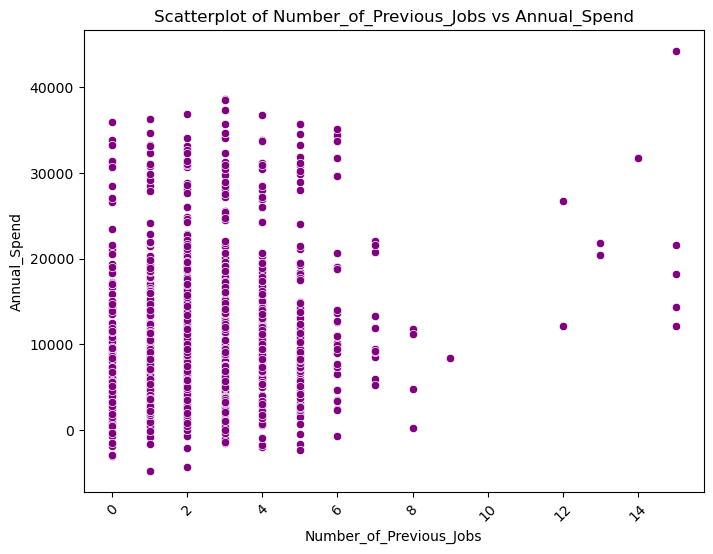

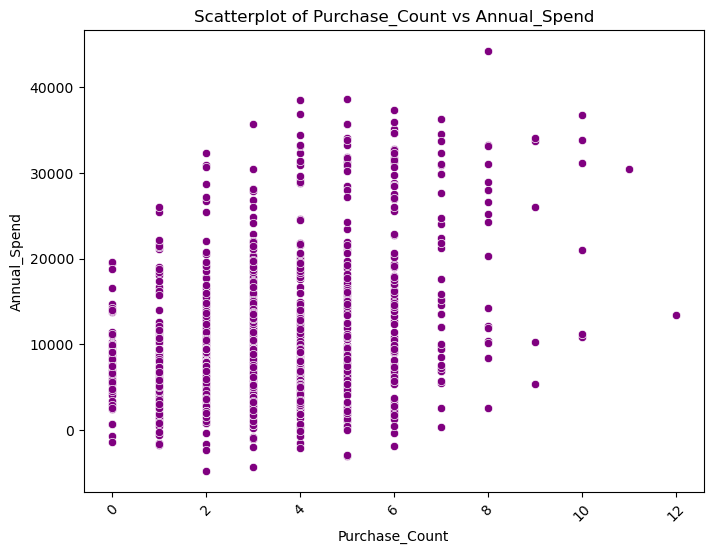

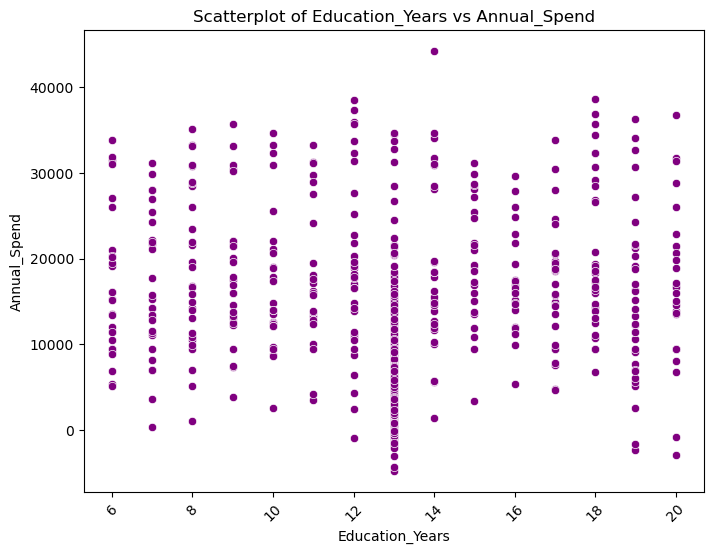

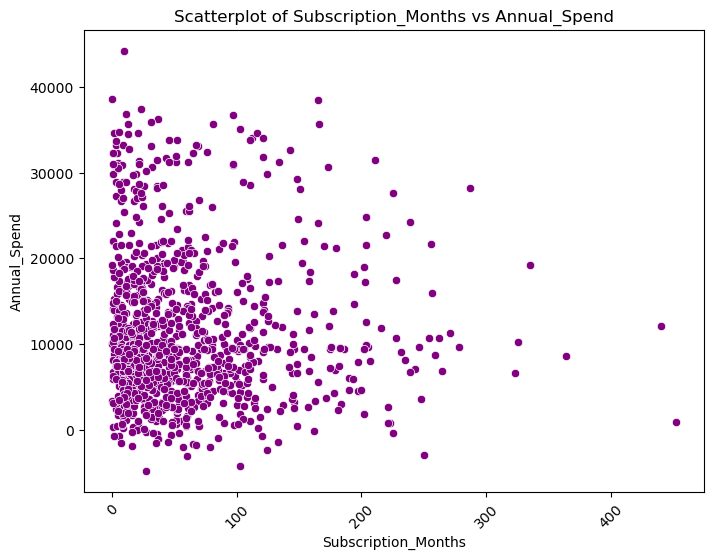

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_vars = ['Age', 'Number_of_Previous_Jobs', 'Purchase_Count', 'Education_Years', 'Subscription_Months']

# Step 2: Create scatterplot for each numerical variable against Annual_Spend
for var in numerical_vars:
    plt.figure(figsize=(8, 6))  # Set the size of the figure
    sns.scatterplot(x=var, y='Annual_Spend', data=data, color='purple')
    plt.title(f'Scatterplot of {var} vs Annual_Spend')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()

In [68]:
data

,Age,Number_of_Previous_Jobs,Income_Level,Has_Mobile_App,Purchase_Count,Review_Rating,Annual_Spend,Education_Years,Subscription_Months
0,87,15,0,0,8,5,44208.19,14,10
1,86,15,1,0,3,3,14373.85,13,35
2,91,14,2,1,6,4,31689.01,20,43
3,92,12,1,1,2,5,26693.14,13,18
4,85,12,1,0,4,3,12150.15,13,23
...,...,...,...,...,...,...,...,...,...
995,34,1,1,1,2,3,3654.56,13,47
996,44,5,0,1,5,2,30163.81,9,27
997,38,1,1,1,2,2,2175.08,13,5
998,32,2,1,1,2,2,1933.03,13,13


### Variance Inflation Factor

In [70]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


numerical_vars = ['Age', 'Number_of_Previous_Jobs', 'Purchase_Count', 
                  'Annual_Spend', 'Education_Years', 'Subscription_Months']
X = data[numerical_vars]


vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                  variable        VIF
0                      Age  25.081613
1  Number_of_Previous_Jobs   4.765390
2           Purchase_Count   4.309726
3             Annual_Spend   3.314980
4          Education_Years  14.715171
5      Subscription_Months   1.943472
